In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:\\Users\\Sandip\\Desktop\\test_data\\Machine_Learning\\train_data.csv")

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,Gd,0,Attchd,RFn,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,TA,1,Attchd,RFn,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,Gd,1,Attchd,RFn,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Gd,1,Detchd,Unf,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,Gd,1,Attchd,RFn,836,192,84,12,2008,250000


In [4]:
SalePrice_Mean = np.mean(train['SalePrice'])
SalePrice_Std  = np.std(train['SalePrice'])
print('SalePrice_Mean', SalePrice_Mean)
print('SalePrice_Std', SalePrice_Std)

SalePrice_Mean 169582.65106382978
SalePrice_Std 62558.06014963946


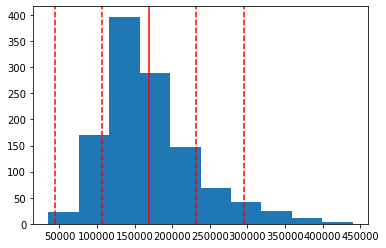

In [5]:
_= plt.hist(train['SalePrice'], bins=10)
_ = plt.axvline(SalePrice_Mean, color='r')
_ = plt.axvline(SalePrice_Mean + SalePrice_Std, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean - SalePrice_Std, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean + SalePrice_Std*2, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean - SalePrice_Std*2, color='r', linestyle='--')

### Sampling distributions
The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as  𝑛  increases. For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

In [6]:
def SalePrice_sampler(n):
    return np.random.choice(train['SalePrice'], n)

In [7]:
seed(47)
# take your samples here
daily_sample_mean = np.empty(500)

for i in range(500):
    daily_sample = SalePrice_sampler(50)
    daily_sample_mean[i] = np.mean(daily_sample)

In [8]:
SalePrice_Mean = np.mean(daily_sample_mean)
SalePrice_Std  = np.std(daily_sample_mean)
print('SalePrice_Mean', SalePrice_Mean)
print('SalePrice_Std', SalePrice_Std)

SalePrice_Mean 169307.89908
SalePrice_Std 8702.553652865989


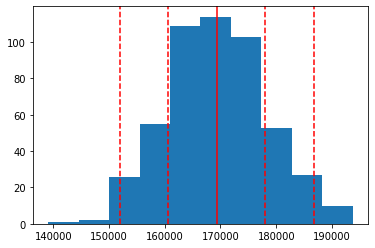

In [9]:
_= plt.hist(daily_sample_mean, bins=10)
_ = plt.axvline(SalePrice_Mean, color='r')
_ = plt.axvline(SalePrice_Mean + SalePrice_Std, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean - SalePrice_Std, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean + SalePrice_Std*2, color='r', linestyle='--')
_ = plt.axvline(SalePrice_Mean - SalePrice_Std*2, color='r', linestyle='--')

In [10]:
from scipy.stats import norm
from scipy.stats import t
s = SalePrice_Std
print('Lower Limit of 95% confidence interval using norm.ppf =' ,round(norm.ppf(0.025, loc=SalePrice_Mean, scale=s),2))
print('Upper Limit of 95% confidence interval using norm.ppf =' ,round(norm.ppf(0.975, loc=SalePrice_Mean, scale=s),2))

Lower Limit of 95% confidence interval using norm.ppf = 152251.21
Upper Limit of 95% confidence interval using norm.ppf = 186364.59


*  there is 95% Chance that Population Mean will fall between 152251.21 & 186364.59
* If we Draw Sample  of size 50 , 500 times 
# t test

__Q__ 1
*  How Neighbourhood Category impact the SalesPrice ? Which Neighbourhood Categories has same range of Housing price ?


__Ans__-

* Define a function that will generate 1000 sample of sample size 10 [ using bootstrap replicate] , and we will use this to 
compare the mean of the two Neighbourhodd categories 
* Sate the hypothesis , 
                        Ho = Two Neighbourhood categories has the same Mean 
                        Ha = Two Neighbourhood categories do not have the same Mean 
* Define t test Function

In [11]:
def bootstrap_replicate_1d(data_1, data_2, func, n):
        """Generate bootstrap replicate of 1D data."""
        bs_sample1 = np.random.choice(data_1, n)
        bs_sample2 = np.random.choice(data_2, n)
        return func(bs_sample1, bs_sample2, equal_var = False)
def ttest_hyp(data1, data2):
    from scipy.stats import stats
    np.random.seed(47)
    N_rep = 1000
    n=10 #sample_size
   
    t_stat  = np.empty(N_rep)
    p_value = np.empty(N_rep)
    
    #bs_replicates = np.empty(N_rep)
    for i in range(N_rep):
        t_stat[i], p_value[i] = bootstrap_replicate_1d(data1, data2, stats.ttest_ind, n)
    p = np.sum(p_value > 0.05 ) / N_rep
    
    # Print the p-value
    if p > 0.05 :
        pass
        #print('Probability of accepting null hypothesis is :- , for below two Neighbourhood', p)

    
    #p = np.sum(p_value < 0.05 ) / N_rep 
    
    # Print the p-value
    #print('Probability of rejecting null hypothesis , if we perform a t_test 500 times is :- p ', p)
    return p

In [12]:
data = train[['Neighborhood','SalePrice']]
max = data.groupby(by=['Neighborhood']).max()
min = data.groupby(by=['Neighborhood']).min()
data_s = pd.merge(max, min, how='inner', on='Neighborhood')
data_s['SalePrice_Diff'] = data_s['SalePrice_x'] - data_s['SalePrice_y']

####  Plot Shows Neighbourhood and SalesPrice Range for Each Category

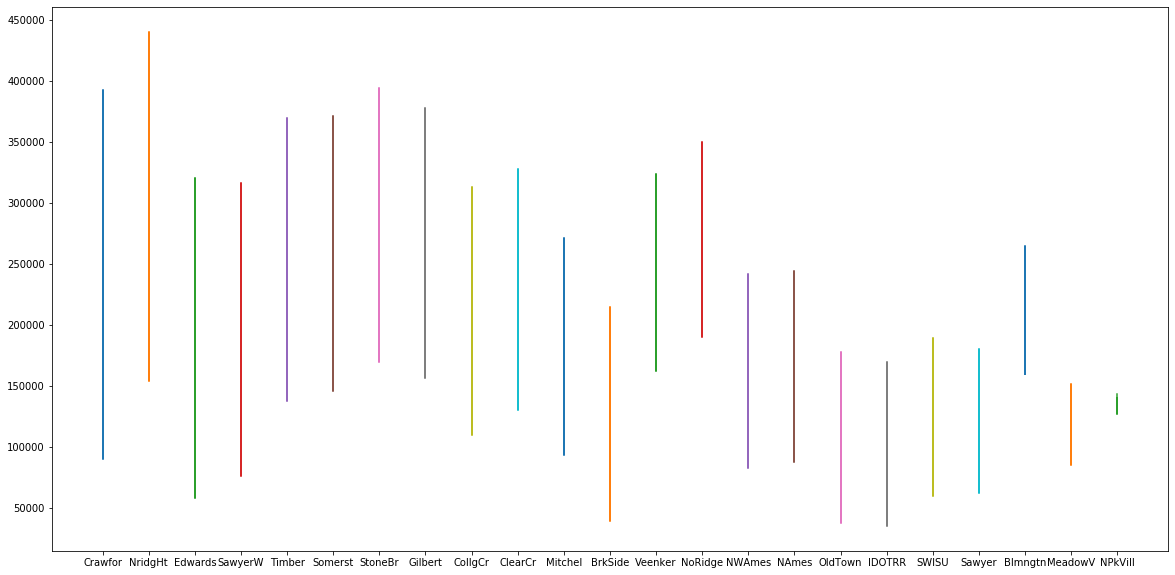

In [13]:
plt.figure(figsize=(20,10))
for s in (data_s.sort_values(by='SalePrice_Diff', ascending=False).index):
    _ = plt.plot(data.set_index('Neighborhood').loc[s])

plt.show()

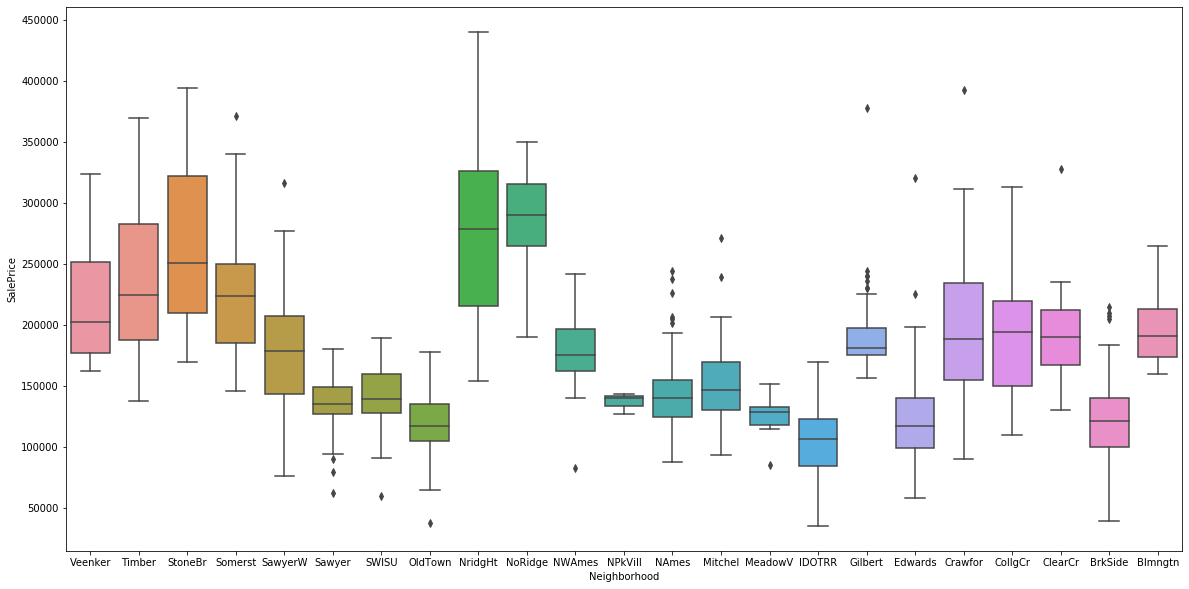

In [14]:
plt.figure(figsize=(20,10))
_= sns.boxplot(x='Neighborhood', y='SalePrice', data=data.sort_values(by='Neighborhood', ascending=False))

#### We will Calculate the Probability Matrix of accepting a hypothesis [ By Performing ttest ] , for Every Category of neighbourhood .


In [15]:
print('Define Hypothesis - Two dataset have equal Mean')
data_p = pd.DataFrame(np.random.rand(0, 23) * 0, columns=data_s.sort_values(by='SalePrice_Diff', ascending=False).index)
i=0
for s1 in set(data.set_index('Neighborhood').index):
    data1 =  data.set_index('Neighborhood').loc[s1]['SalePrice']
    for s2 in set(data.set_index('Neighborhood').index):
        data2 =  data.set_index('Neighborhood').loc[s2]['SalePrice']
        
        data_p.loc[i, 'Neighborhood']=s1
        data_p.loc[i, s2]= ttest_hyp(data1, data2)
    i+=1    
    #data_p.loc[1, s]= ttest_hyp(data1, data2)

Define Hypothesis - Two dataset have equal Mean


#### T test Marix 
* Ho = Two category have equal mean
* Ha = Two category do not equal mean
* Draw 1000 sample of Size 10 

In [21]:
data_p.set_index('Neighborhood')

Neighborhood,Crawfor,NridgHt,Edwards,SawyerW,Timber,Somerst,StoneBr,Gilbert,CollgCr,ClearCr,...,NoRidge,NWAmes,NAmes,OldTown,IDOTRR,SWISU,Sawyer,Blmngtn,MeadowV,NPkVill
Neighborhood,,,,,,,,,,,,,,,,,,,,,
NWAmes,0.899,0.010,0.117,0.952,0.201,0.263,0.039,0.893,0.898,0.886,...,0.000,0.955,0.182,0.005,0.001,0.129,0.055,0.810,0.005,0.033
NAmes,0.288,0.000,0.637,0.524,0.001,0.001,0.000,0.021,0.146,0.097,...,0.000,0.196,0.962,0.527,0.177,0.949,0.949,0.020,0.674,0.940
CollgCr,0.944,0.109,0.076,0.902,0.557,0.701,0.226,0.935,0.947,0.937,...,0.004,0.905,0.147,0.002,0.001,0.145,0.063,0.940,0.003,0.038
Timber,0.682,0.698,0.006,0.352,0.955,0.928,0.868,0.482,0.555,0.664,...,0.397,0.189,0.000,0.000,0.000,0.000,0.000,0.514,0.000,0.000
StoneBr,0.388,0.929,0.000,0.147,0.868,0.724,0.949,0.183,0.235,0.320,...,0.845,0.029,0.000,0.000,0.000,0.000,0.000,0.181,0.000,0.000
IDOTRR,0.003,0.000,0.811,0.020,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.176,0.777,0.949,0.308,0.264,0.000,0.616,0.133
Edwards,0.100,0.001,0.957,0.250,0.008,0.009,0.001,0.059,0.090,0.053,...,0.000,0.110,0.651,0.948,0.824,0.724,0.733,0.048,0.930,0.631
Veenker,0.859,0.439,0.021,0.603,0.882,0.950,0.639,0.758,0.814,0.844,...,0.118,0.516,0.004,0.000,0.000,0.001,0.000,0.838,0.000,0.000
MeadowV,0.041,0.000,0.926,0.143,0.000,0.000,0.000,0.000,0.006,0.001,...,0.000,0.008,0.662,0.924,0.622,0.735,0.760,0.000,0.957,0.587


#### Neighbourhood Categories - Somerset , Veenker and Timberland has same range of Housing Prices
* If we draw 1000 samples of data of each above category and perform the t test , we found that there is 95% probability of accepting the hypothesis.    [ Ho =  Somerset and Timber has same Mean  ]
* And 92 probability of accepting the hypothesis.  [ Ho =  Somerset and Timber has same Mean  ]

# ANOVA (F-TEST)
* Now we study the Neighbourhood Categories [  using ANOVA  ]
<img src="ANOVA.png">

In [22]:
data_p[['Timber','Neighborhood']].sort_values(by = 'Timber', ascending=False).set_index('Neighborhood').head(10)

Neighborhood,Timber
Neighborhood,
Timber,0.955
Somerst,0.911
Veenker,0.882
StoneBr,0.868
Crawfor,0.697
NridgHt,0.690
ClearCr,0.652
CollgCr,0.557
Blmngtn,0.512


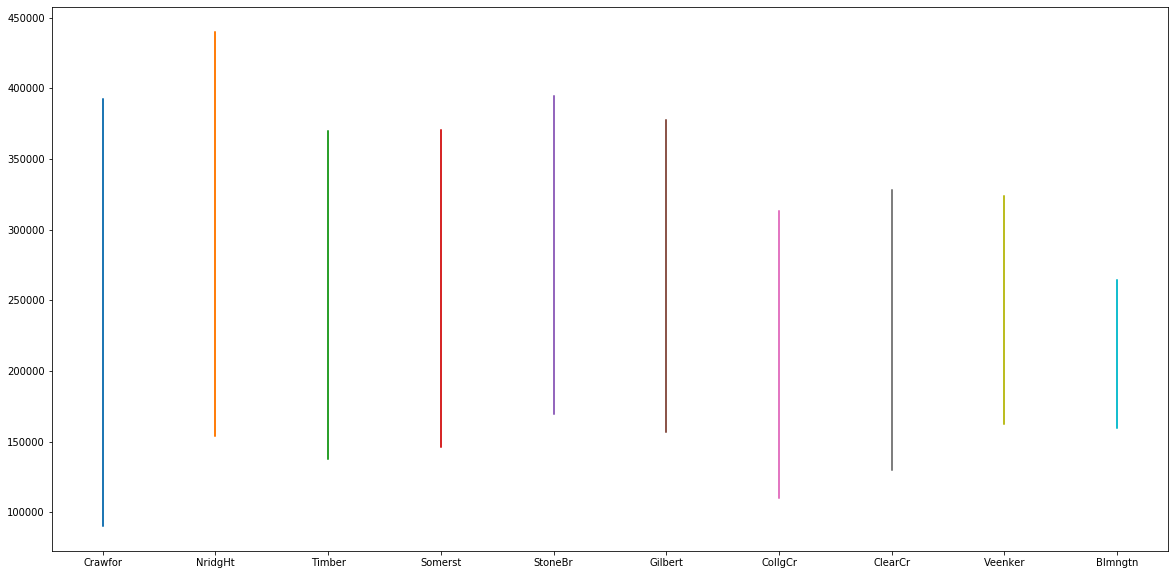

In [23]:
l = list(data_p[['Timber','Neighborhood']].sort_values(by = 'Timber', ascending=False).set_index('Neighborhood').head(10).index)

plt.figure(figsize=(20,10))

for s in (data_s.loc[l].sort_values(by='SalePrice_Diff', ascending=False).index):
    _ = plt.plot(data.set_index('Neighborhood').loc[s])

plt.show()

### Perform One Way F-test(Anova) for above 9 groups 

In [25]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[3]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[4]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[5]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[6]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[7]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[8]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[9]]['SalePrice'].values[:30])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  9.955481332985218e-16
reject null hypothesis


#### What about first 4 group , that have more than 85% probability of having equal mean value , as we see above[ t test ] 

In [26]:
data_p[['Timber','Neighborhood']].sort_values(by = 'Timber', ascending=False).set_index('Neighborhood').head(4)

Neighborhood,Timber
Neighborhood,
Timber,0.955
Somerst,0.911
Veenker,0.882
StoneBr,0.868


In [27]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[3]]['SalePrice'].values[:30]) 

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.08531355022906213
accept null hypothesis


In [28]:
train['Neighborhood'].drop_duplicates().count()

23

# Conclusion : There are 23 categories in Neighborhood feature , We can easily make the categories  having same Mean and Variance  as one group
* For Example Timber , Somerst ,Veenker and  StoneBr as one Category

In [29]:
train_num = data_p.set_index('Neighborhood')

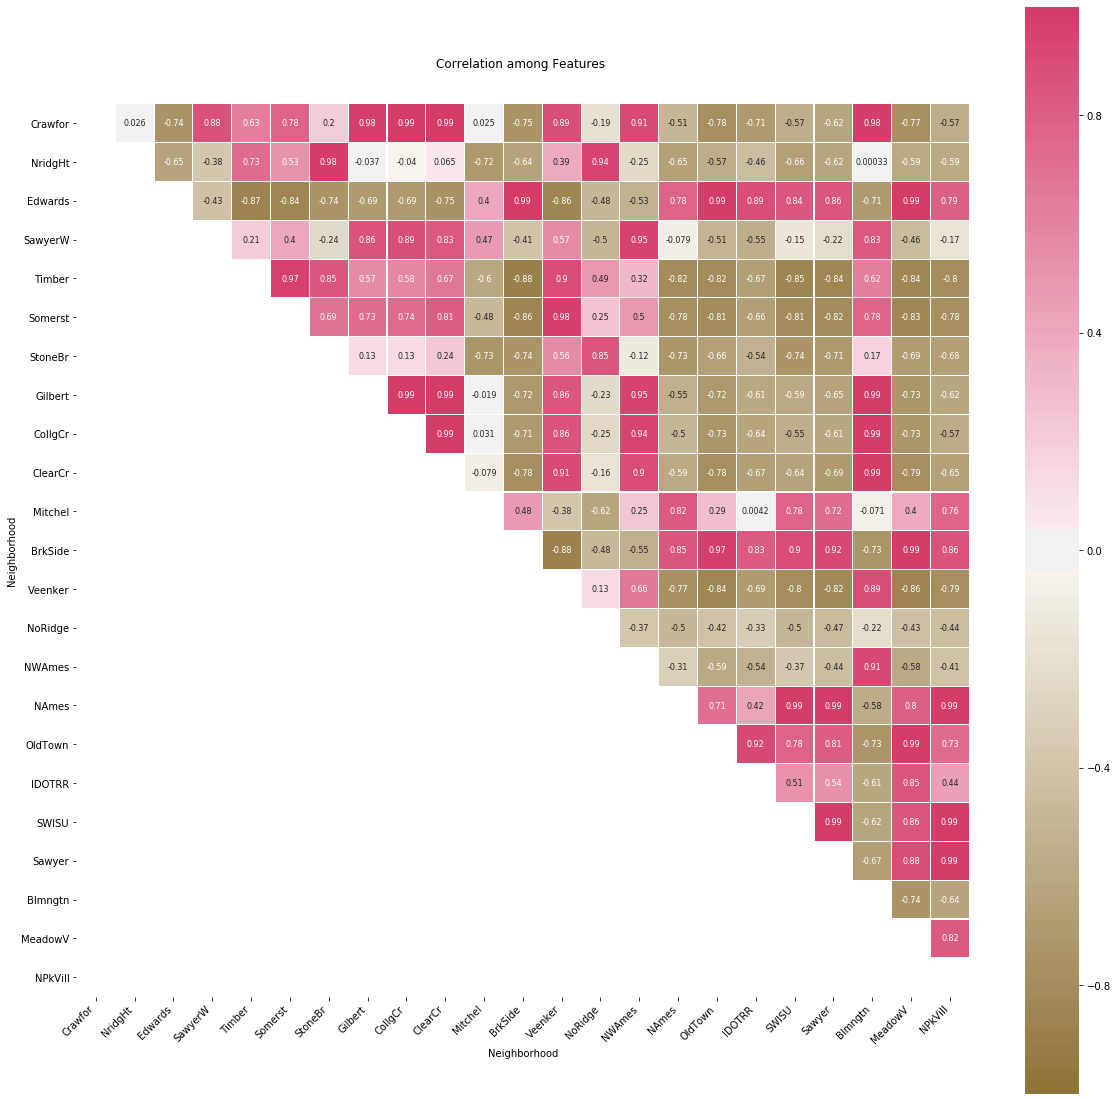

In [30]:
#print(train)
import seaborn as sns
#sns.heatmap(train)
matrix = np.tril(train_num.corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(train_num.corr(),#.sort_values(by=['SalePrice']), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 8},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True,
                 mask=matrix)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [31]:
data_p[['Crawfor','Neighborhood']].sort_values(by = 'Crawfor', ascending=False).set_index('Neighborhood').head(8)

Neighborhood,Crawfor
Neighborhood,
Crawfor,0.959
ClearCr,0.958
Gilbert,0.951
Blmngtn,0.948
CollgCr,0.944
SawyerW,0.900
NWAmes,0.899
Veenker,0.859


In [32]:
l = list(data_p[['Crawfor','Neighborhood']].sort_values(by = 'Crawfor', ascending=False).set_index('Neighborhood').head(8).index)

In [33]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[3]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[4]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[5]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[6]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[7]]['SalePrice'].values[:30])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.2829336765395865
accept null hypothesis


In [34]:
data_p[['NAmes','Neighborhood']].sort_values(by = 'NAmes', ascending=False).set_index('Neighborhood').head(5)

Neighborhood,NAmes
Neighborhood,
NAmes,0.962
SWISU,0.946
NPkVill,0.945
Sawyer,0.927
Mitchel,0.883


In [35]:
l = list(data_p[['NAmes','Neighborhood']].sort_values(by = 'NAmes', ascending=False).set_index('Neighborhood').head(5).index)

In [36]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[3]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[4]]['SalePrice'].values[:30])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0688468280134054
accept null hypothesis


In [37]:
data_p[['Edwards','Neighborhood']].sort_values(by = 'Edwards', ascending=False).set_index('Neighborhood').head(5)

Neighborhood,Edwards
Neighborhood,
Edwards,0.957
OldTown,0.954
BrkSide,0.935
MeadowV,0.926
IDOTRR,0.811


In [38]:
l = list(data_p[['Edwards','Neighborhood']].sort_values(by = 'Edwards', ascending=False).set_index('Neighborhood').head(5).index)

In [39]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30],
                      data[data['Neighborhood']==l[3]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[4]]['SalePrice'].values[:30])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.09519846869840162
accept null hypothesis


In [40]:
data_p[['NoRidge','Neighborhood']].sort_values(by = 'NoRidge', ascending=False).set_index('Neighborhood').head(5)

Neighborhood,NoRidge
Neighborhood,
NoRidge,0.948
NridgHt,0.927
StoneBr,0.845
Timber,0.397
Somerst,0.164


In [41]:
l = list(data_p[['NridgHt','Neighborhood']].sort_values(by = 'NridgHt', ascending=False).set_index('Neighborhood').head(3).index)

In [42]:
data_p[['NridgHt','Neighborhood']].sort_values(by = 'NridgHt', ascending=False).set_index('Neighborhood').head(3)

Neighborhood,NridgHt
Neighborhood,
NridgHt,0.938
StoneBr,0.929
NoRidge,0.927


In [43]:
from scipy.stats import stats

F, p = stats.f_oneway(data[data['Neighborhood']==l[0]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[1]]['SalePrice'].values[:30], 
                      data[data['Neighborhood']==l[2]]['SalePrice'].values[:30])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.31724500259158567
accept null hypothesis


### We Can Make Group of below Categories : 
* Neighbourhood_Group1
         Crawfor,
         ClearCr,
         Gilbert,
         Blmngtn,
         CollgCr,
         SawyerW,
         NWAmes ,
         Veenker  
* Neighbourhood_Group2
         NAmes   ,
         SWISU   ,
         NPkVill ,
         Sawyer  ,
         Mitchel 
* Neighbourhood_Group3
         Edwards,
         OldTown,
         BrkSide,
         MeadowV,
         IDOTRR
* Neighbourhood_Group4
         NridgHt,
         StoneBr,
         NoRidge
* Neighbourhood_Group5
         Timber 
         Somerst


#### Clean the Data and Form above Group in Neighbourhood

In [44]:
df = train

In [45]:
for i in data_p[['Crawfor','Neighborhood']].sort_values(by = 'Crawfor', ascending=False).set_index('Neighborhood').head(8).index:
    df['Neighborhood'].replace(i,'Neighbourhood_Group1', inplace=True)
for i in data_p[['NAmes','Neighborhood']].sort_values(by = 'NAmes', ascending=False).set_index('Neighborhood').head(5).index:
    df['Neighborhood'].replace(i,'Neighbourhood_Group2', inplace=True)
for i in data_p[['Edwards','Neighborhood']].sort_values(by = 'Edwards', ascending=False).set_index('Neighborhood').head(5).index:
    df['Neighborhood'].replace(i,'Neighbourhood_Group3', inplace=True)
for i in data_p[['NridgHt','Neighborhood']].sort_values(by = 'NridgHt', ascending=False).set_index('Neighborhood').head(3).index:
    df['Neighborhood'].replace(i,'Neighbourhood_Group4', inplace=True)
for i in data_p[['Timber','Neighborhood']].sort_values(by = 'Timber', ascending=False).set_index('Neighborhood').head(2).index:
    df['Neighborhood'].replace(i,'Neighbourhood_Group5', inplace=True)

In [49]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,Neighbourhood_Group1,2Story,7,5,...,Gd,0,Attchd,RFn,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Neighbourhood_Group1,1Story,6,8,...,TA,1,Attchd,RFn,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,Neighbourhood_Group1,2Story,7,5,...,Gd,1,Attchd,RFn,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Neighbourhood_Group1,2Story,7,5,...,Gd,1,Detchd,Unf,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,Neighbourhood_Group4,2Story,8,5,...,Gd,1,Attchd,RFn,836,192,84,12,2008,250000
